In [ ]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

In [3]:
wood_a = np.array([97, 80, 95, 77, 75, 97, 78, 63, 90, 92, 93, 78])
wood_b = np.array([79, 63, 89, 69, 69, 88, 80, 58, 92, 88, 83, 81])
d = wood_a - wood_b

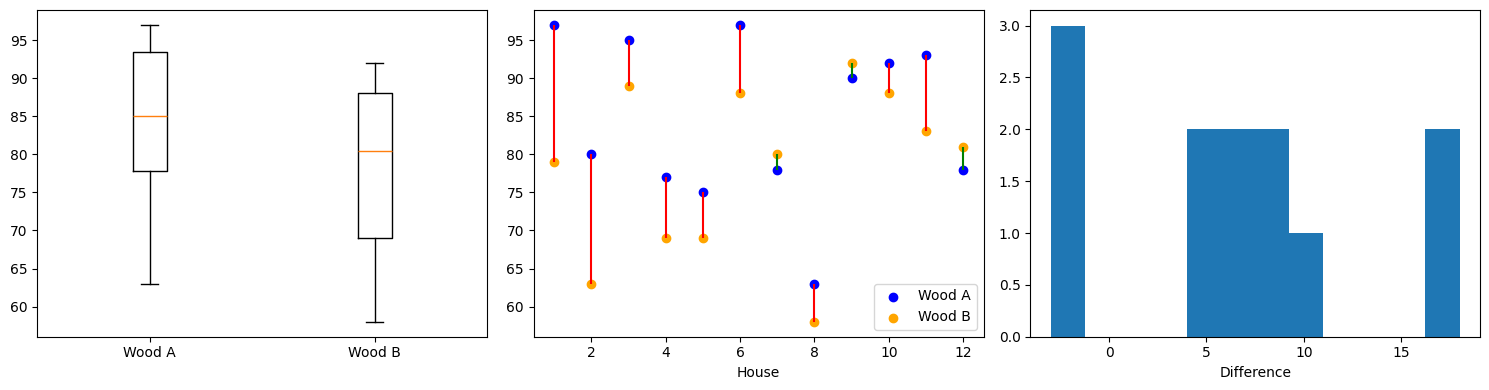

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axs[0].boxplot([wood_a, wood_b], tick_labels=["Wood A", "Wood B"])

axs[1].scatter(np.arange(1, len(wood_a) + 1), wood_a, label="Wood A", color="blue")
axs[1].scatter(np.arange(1, len(wood_b) + 1), wood_b, label="Wood B", color="orange")

for house_num, (indoor, outdoor) in enumerate(zip(wood_a, wood_b), start=1):
    lower, upper, color = (
        (indoor, outdoor, "green") if indoor < outdoor else (outdoor, indoor, "red")
    )

    axs[1].vlines(house_num, lower, upper, color=color)

axs[1].set_xlabel("House")
axs[1].legend()

axs[2].hist(d, bins=12)
axs[2].set_xlabel("Difference")

plt.tight_layout()
plt.show()

In [5]:
d_interval = (
    round(
        float(d.mean() + t.ppf(0.025, df=12 - 1) * d.std(ddof=1) / np.sqrt(len(d))), 3
    ),
    round(
        float(d.mean() - t.ppf(0.025, df=12 - 1) * d.std(ddof=1) / np.sqrt(len(d))), 3
    ),
)
d_interval

(2.021, 10.645)

In [36]:
wood_a_replacement_year = -50 / ((wood_a - 100) / 2)
wood_b_replacement_year = -50 / ((wood_b - 100) / 2)

In [49]:
d_replacement_year = wood_a_replacement_year - wood_b_replacement_year
d_replacement_year

array([28.57142857,  2.2972973 , 10.90909091,  1.12201964,  0.77419355,
       25.        , -0.45454545,  0.32175032, -2.5       ,  4.16666667,
        8.40336134, -0.71770335])

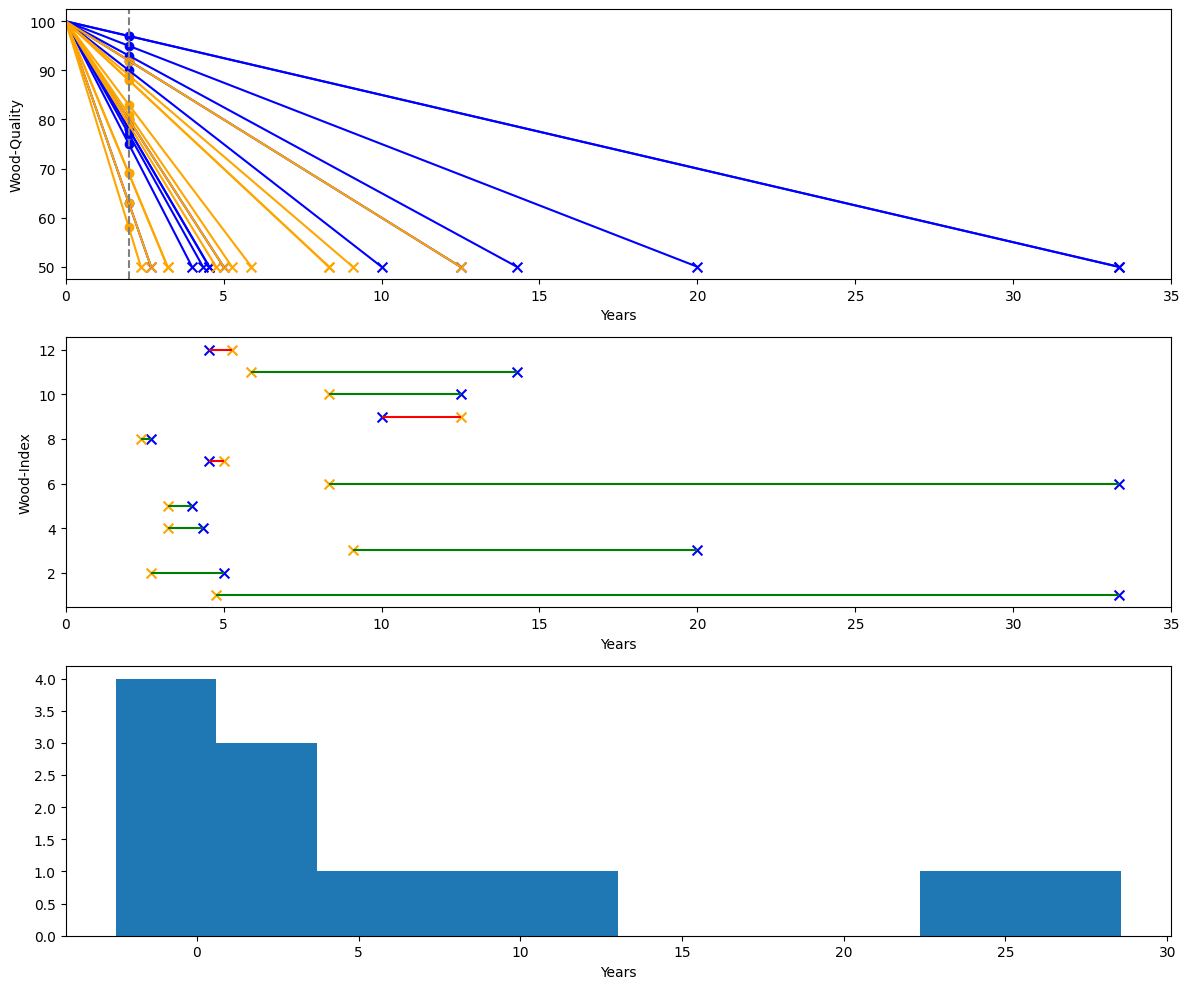

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

for a in wood_a:
    axs[0].scatter([2], [a], color="blue")
for wood_idx, a_ry in enumerate(wood_a_replacement_year, start=1):
    axs[0].plot([0, a_ry], [100, 50], color="blue")
    axs[0].scatter([a_ry], [50], color="blue", marker="x", s=50)

for a in wood_b:
    axs[0].scatter([2], [a], color="orange")
for wood_idx, b_ry in enumerate(wood_b_replacement_year, start=1):
    axs[0].plot([0, b_ry], [100, 50], color="orange")
    axs[0].scatter([b_ry], [50], color="orange", marker="x", s=50)

axs[0].axvline(x=2, color="gray", linestyle="--")

axs[0].set_xlim([0, 35])
axs[0].set_xlabel("Years")
axs[0].set_ylabel("Wood-Quality")

for wood_idx, (a_ry, b_ry) in enumerate(
    zip(wood_a_replacement_year, wood_b_replacement_year), start=1
):
    axs[1].scatter([a_ry], [wood_idx], marker="x", s=50, color="blue")
    axs[1].scatter([b_ry], [wood_idx], marker="x", s=50, color="orange")
    axs[1].hlines(
        wood_idx,
        xmin=min(a_ry, b_ry),
        xmax=max(a_ry, b_ry),
        color="green" if a_ry > b_ry else "red",
    )

axs[1].set_xlim([0, 35])
axs[1].set_xlabel("Years")
axs[1].set_ylabel("Wood-Index")

axs[2].hist(d_replacement_year)
axs[2].set_xlabel("Years")

plt.tight_layout()
plt.show()

In [110]:
d_replacement_year_log = np.log(d_replacement_year + 5)
d_replacement_year_log

array([3.51367537, 1.98750405, 2.7668907 , 1.81189205, 1.7533986 ,
       3.40119738, 1.51412773, 1.67180226, 0.91629073, 2.21557372,
       2.59550552, 1.45448947])

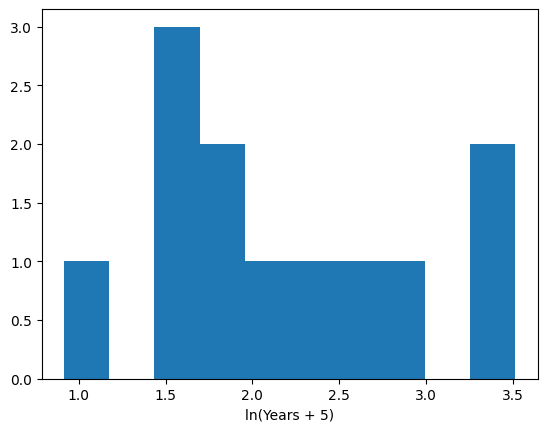

In [114]:
plt.hist(d_replacement_year_log)
plt.xlabel("ln(Years + 5)")

plt.show()

In [122]:
t_val = t.ppf(0.025, df=len(d_replacement_year_log) - 1)

interval_left = d_replacement_year_log.mean() + t_val * (
    d_replacement_year_log.std(ddof=1) / len(d_replacement_year_log) ** 0.5
)
interval_right = d_replacement_year_log.mean() - t_val * (
    d_replacement_year_log.std(ddof=1) / len(d_replacement_year_log) ** 0.5
)

print(f"({round(interval_left, 2)}, {round(interval_right, 2)})")

(1.63, 2.64)


In [126]:
t_val

np.float64(-2.200985160082949)

In [118]:
round(float(np.exp(interval_left) - 5), 2), round(float(np.exp(interval_right) - 5), 2)

(0.12, 8.92)